# Imports

In [79]:
import sys
from cycler import cycler
from pprint import pprint
import numpy as np
import matplotlib
from matplotlib import pyplot as plt, animation
import proplot as plot

sys.path.append('/Users/46h/Research/code/accphys')
from tools import plotting as myplt
from tools.utils import list_files, show

# Settings

In [96]:
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc.style = None
colormap = plt.cm.viridis
dpi=500

output_dir = '_output/data/'

# Read Data

In [42]:
def swap(i, j, array):
    array[i], array[j] = array[j], array[i]

perveances = np.loadtxt('_output/data/perveances.dat')
transfer_mats_files = [''.join([output_dir, f]) 
                       for f in list_files(output_dir) if f.endswith('.npy')]
swap(0, 1, transfer_mats_files)
swap(2, 3, transfer_mats_files)

transfer_mats_arr = np.array([np.load(file) for file in transfer_mats_files])

In [43]:
print('transfer mats files')
pprint(transfer_mats_files)
print()
print('perveances:')
pprint(perveances[:, np.newaxis])

transfer mats files
['_output/data/fodo_quadstart.npy',
 '_output/data/fodo_split_quadstart.npy',
 '_output/data/fodo_skew_quadstart.npy',
 '_output/data/fodo_sol_quadstart.npy']

perveances:
array([[0.00000000e+00],
       [6.49611062e-06],
       [1.29922212e-05],
       [1.94883319e-05],
       [2.59844425e-05],
       [3.24805531e-05],
       [3.89766637e-05],
       [4.54727743e-05]])


In [60]:
lattice_names = [
    'FODO',
    'FODO\n(split tunes)',
    'FODO\n(skew quads)',
    'FODO\n(solenoid insert)'
]

# Plot 

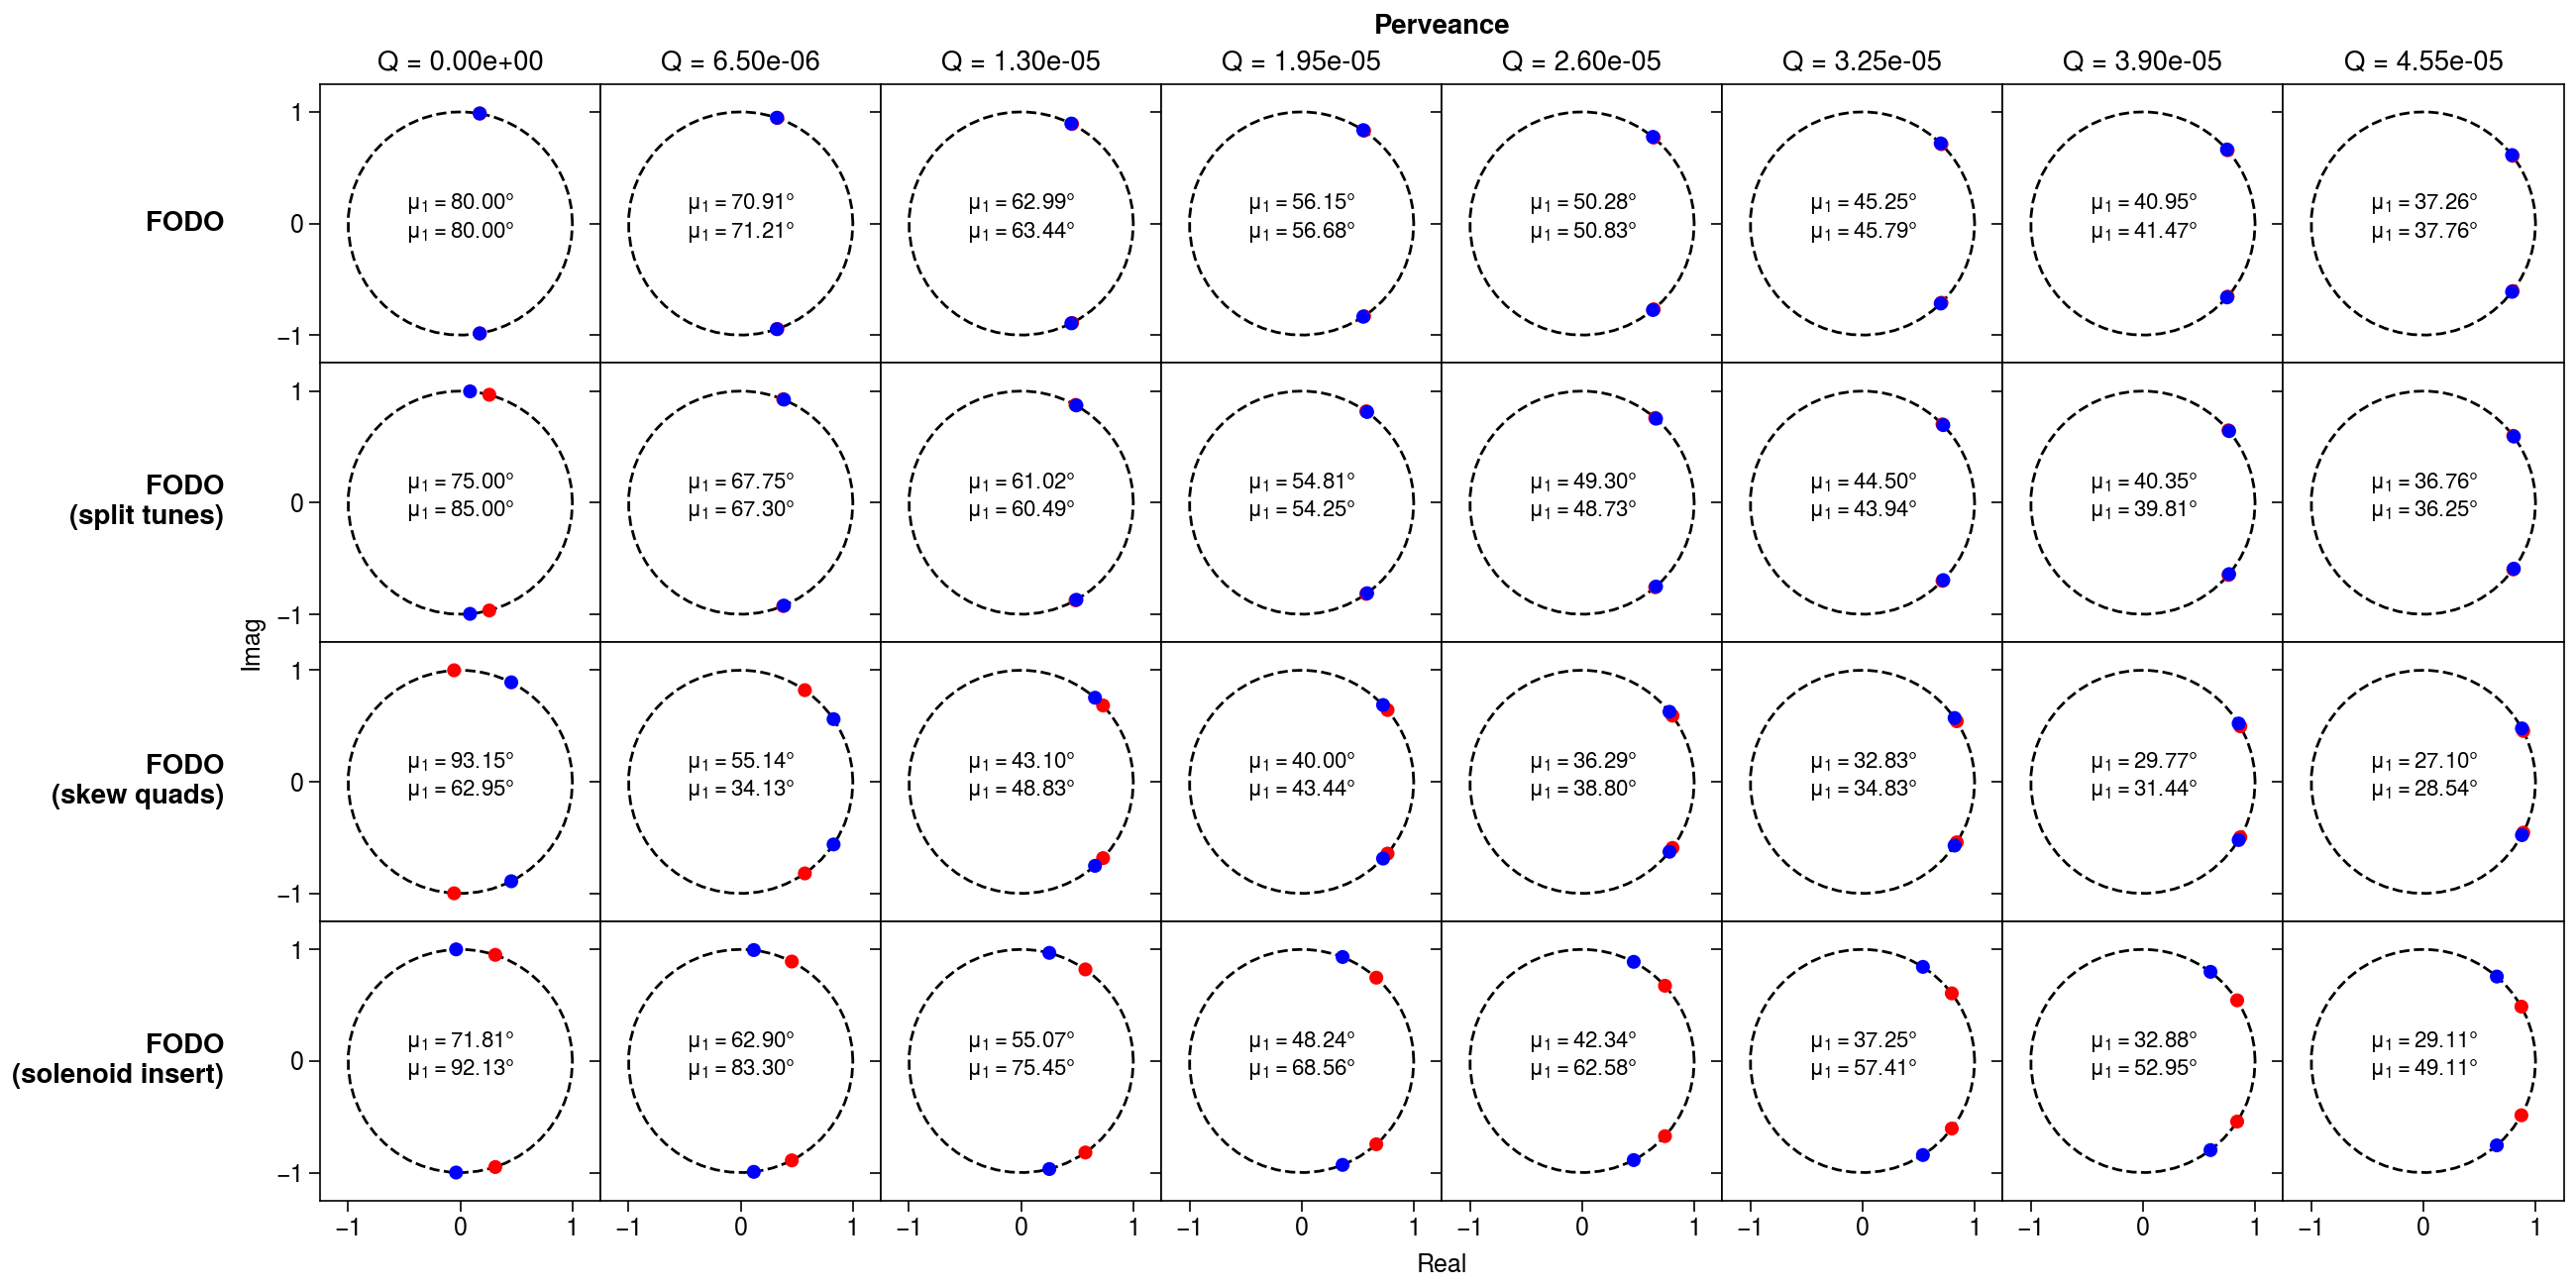

In [68]:
nrows, ncols, _, _ = transfer_mats_arr.shape
s = 20
fontsize=8

fig, axes = plot.subplots(nrows=nrows, ncols=ncols, figsize=(13, 6.5), hspace=0, wspace=0)
myplt.set_labels(axes[0, :], ['Q = {:.2e}'.format(Q) for Q in perveances], 'title')

# Plot unit circle in background
psi = np.linspace(0, 2*np.pi, 50)
x_circle, y_circle = np.cos(psi), np.sin(psi)
for ax in axes:
    ax.plot(x_circle, y_circle, 'k--', lw=1, zorder=0)
    
# Plot eigenvalues
for i in range(nrows):
    for ax, M in zip(axes[i, :], transfer_mats_arr[i]):
        eigvals, eigvecs = np.linalg.eig(M)
        ax.scatter(eigvals.real, eigvals.imag,  s=s, c=('r', 'r', 'b', 'b'), zorder=1)
        mu1, _, mu2, _ = np.degrees(np.arccos(eigvals.real))
        split, fontsize = 0.05, 8
        ax.annotate(r'$\mu_1 = {:.2f}\degree$'.format(mu1), xy=(0.5, 0.5+split), 
                    xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
        ax.annotate(r'$\mu_1 = {:.2f}\degree$'.format(mu2), xy=(0.5, 0.5-split), 
                    xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
        
# Formatting
scale = 1.25
axes.format(
    suptitle='Perveance', grid=False,
    xlim=(-scale, scale), ylim=(-scale, scale), xlabel='Real', ylabel='Imag',
    xticks=[-1, 0, 1], yticks=[-1, 0, 1],
    rowlabels=lattice_names, 
    xminorlocator='null', yminorlocator='null'
)
        
plt.savefig('_output/figures/eigvals.png', dpi=dpi, facecolor='w')

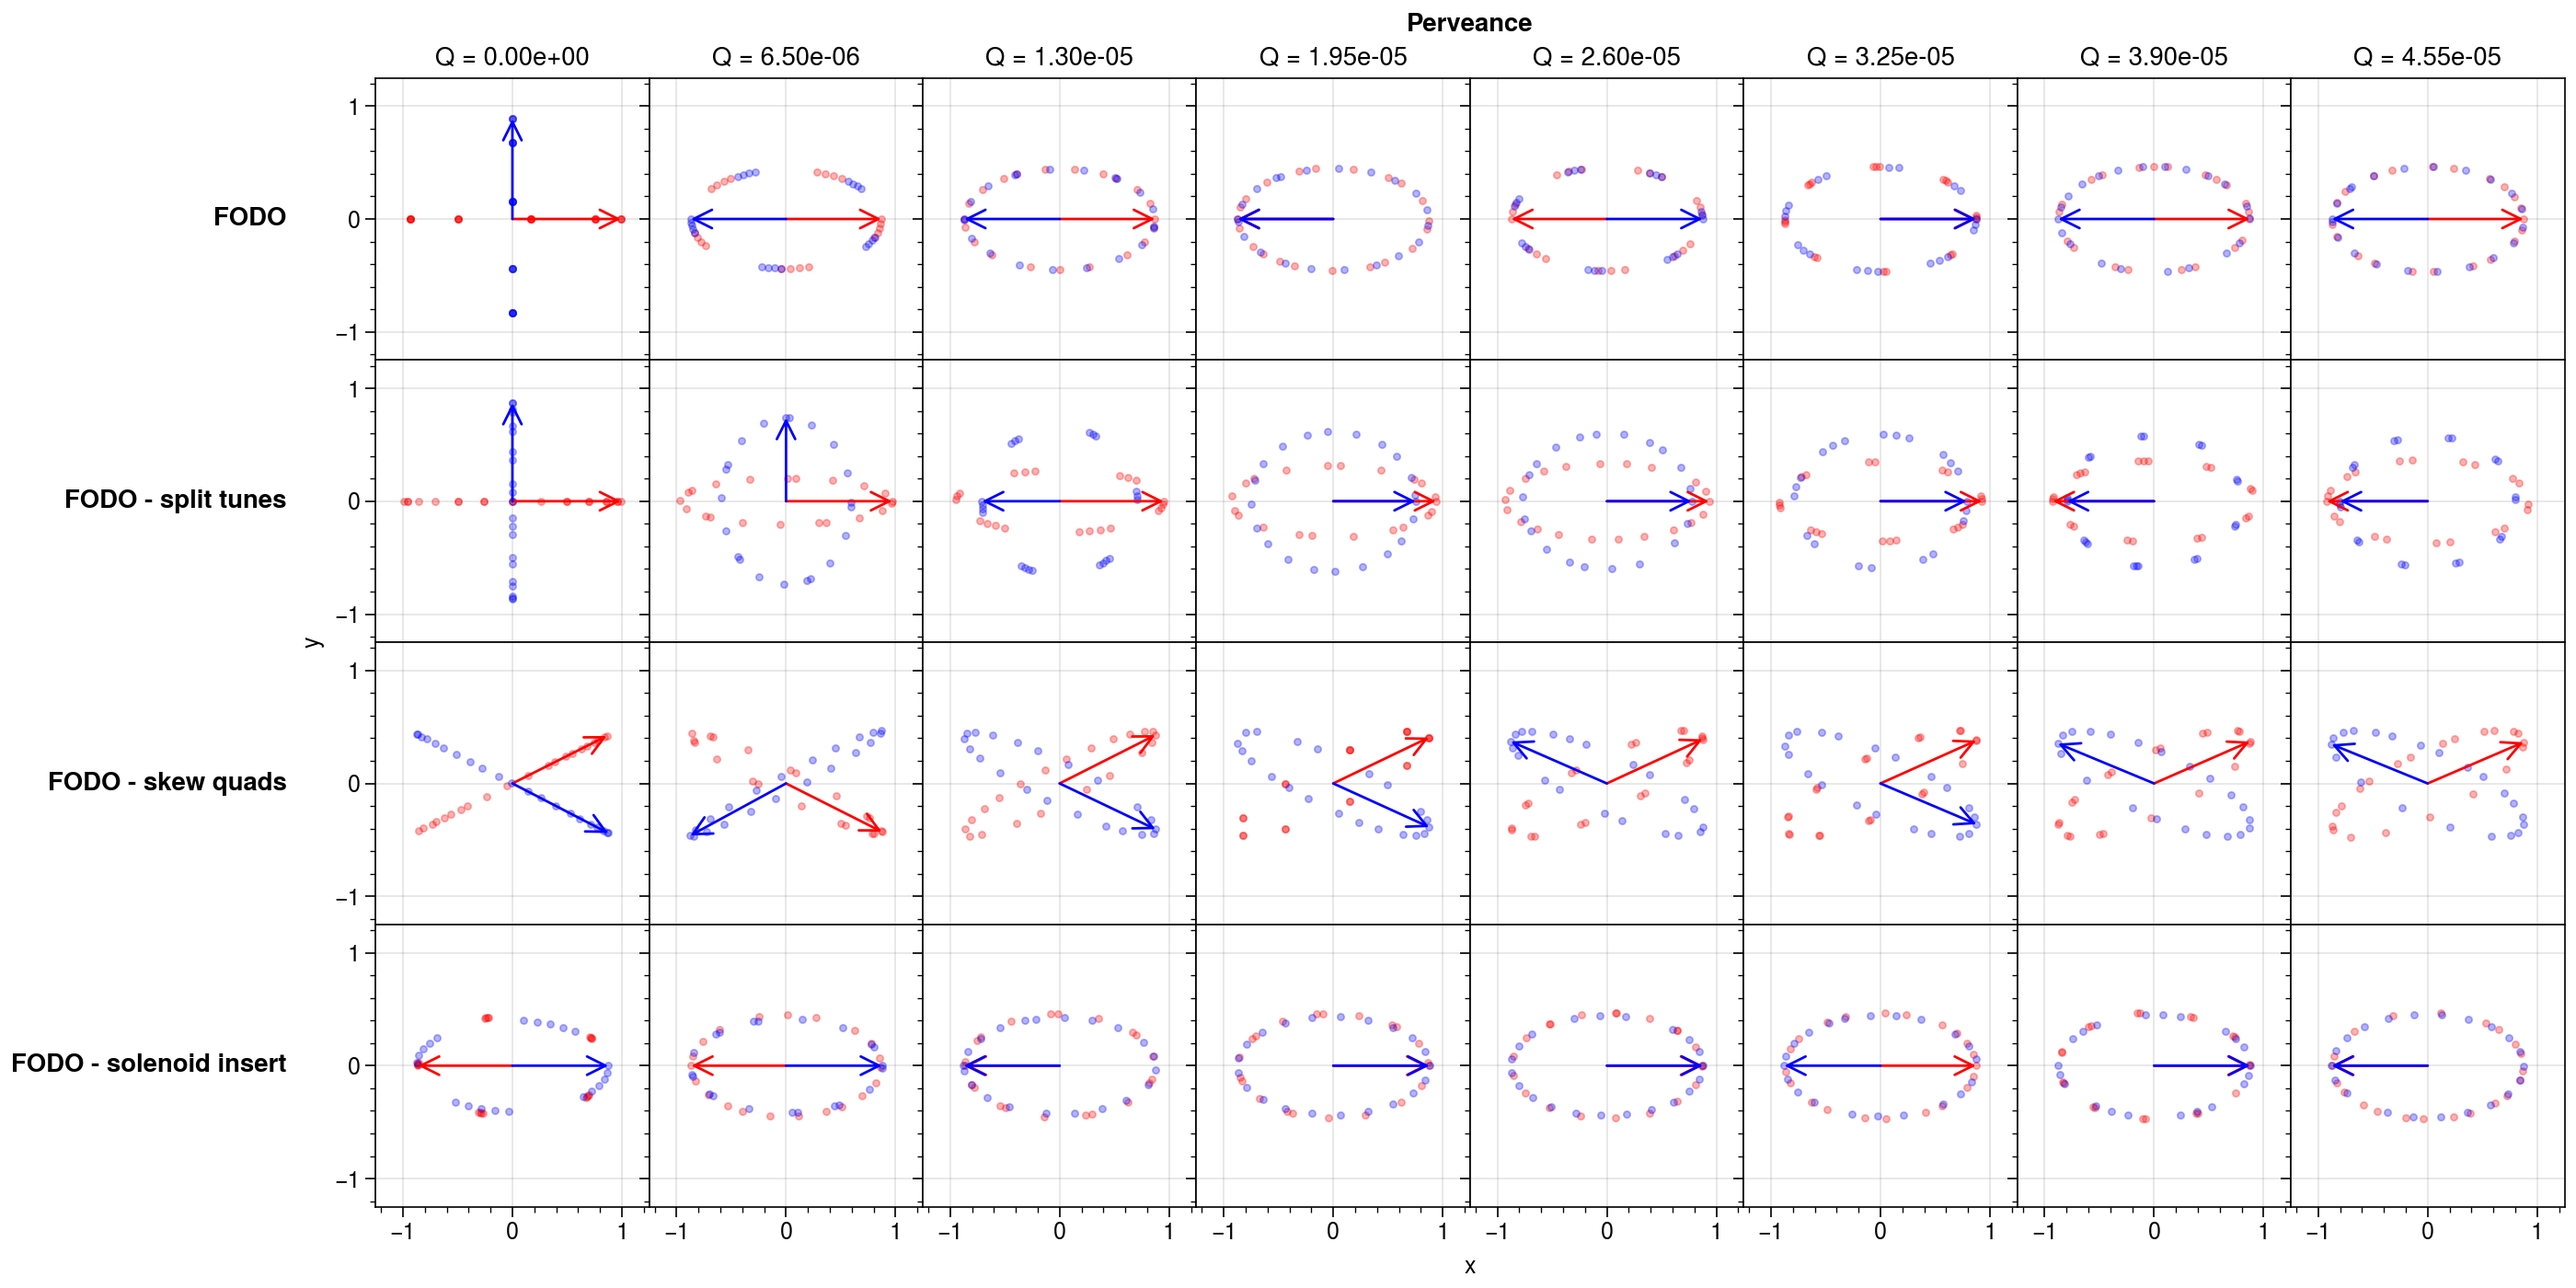

In [50]:
fig, axes = plot.subplots(nrows=nrows, ncols=ncols, figsize=(14, 7), hspace=0, wspace=0)
myplt.set_labels(axes[0, :], ['Q = {:.2e}'.format(Q) for Q in perveances], 'title')
scale = 1.25
axes.format(
    suptitle='Perveance',
    xlim=(-scale, scale), ylim=(-scale, scale), 
    xlabel='x', ylabel='y',
    xticks=[-1, 0, 1], yticks=[-1, 0, 1],
    leftlabels=lattice_names, 
)
for i in range(nrows):
    for ax, M in zip(axes[i, :], transfer_mats_arr[i]):
        myplt.eigvec_trajectory(ax, M, 'x', 'y', s=7, lw=1)
        
plt.savefig('_output/figures/eigvecs.png', dpi=dpi, facecolor='w')

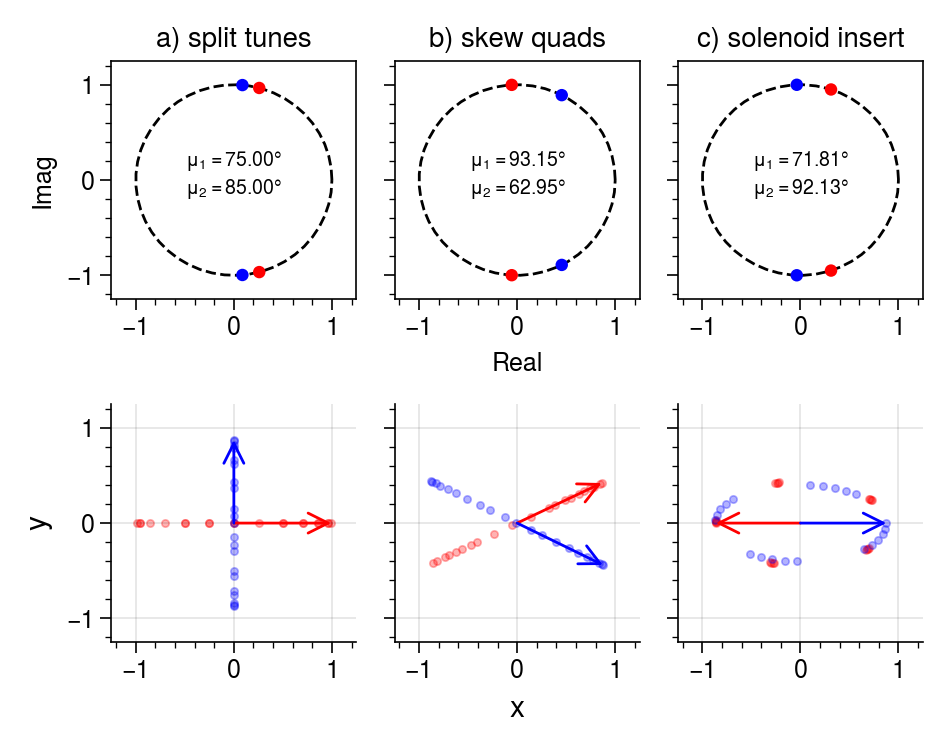

In [66]:
transfer_mats = transfer_mats_arr[[1, 2, 3], 0] # fodo_split, fodo_skew, fodo_sol

fig, axes = plt.subplots(2, 3, figsize=(4.75, 3.75), sharex='row', sharey='row', tight_layout=True)

for (ax1, ax2), M in zip(axes.T, transfer_mats):
    eigvals, eigvecs = np.linalg.eig(M)
    ax1.plot(x_circle, y_circle, 'k--', lw=1, zorder=0)
    ax1.scatter(eigvals.real, eigvals.imag,  s=15, c=('r', 'r', 'b', 'b'), zorder=1)
    myplt.eigvec_trajectory(ax2, M, 'x', 'y', s=7, lw=1)
    mu1, _, mu2, _ = np.degrees(np.arccos(eigvals.real))
    split, fontsize = 0.06, 7
    ax1.annotate(r'$\mu_1 = {:.2f}\degree$'.format(mu1), xy=(0.5, 0.5+split), xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)
    ax1.annotate(r'$\mu_2 = {:.2f}\degree$'.format(mu2), xy=(0.5, 0.5-split), xycoords='axes fraction', horizontalalignment='center', fontsize=fontsize)

myplt.set_labels(axes[0, :], ['a) split tunes','b) skew quads','c) solenoid insert'], 'title')
myplt.set_limits(axes.flat, 6*[(-scale, scale)], 'xy')
myplt.toggle_grid(axes[0, :], 'off')
myplt.despine(axes[1, :], ('top', 'right'))
axes[0, 1].set_xlabel('Real')
axes[0, 0].set_ylabel('Imag')
axes[1, 1].set_xlabel(r'$x$', fontsize='large')
axes[1, 0].set_ylabel(r'$y$', fontsize='large')
    
plt.savefig('_output/figures/subplots.png', dpi=dpi, facecolor='w')